In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from splearn.EnsembleLearning.TreeBagger import TreeBagger

In [2]:
train_df = pd.read_csv("data/bank/train.csv")
test_df = pd.read_csv("data/bank/test.csv")

X_train = train_df[train_df.columns[:-1]]
y_train = train_df[train_df.columns[-1]]

X_test = test_df[test_df.columns[:-1]]
y_test = test_df[test_df.columns[-1]]

train_df.head()

,age,job,marital,edu,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [7]:
from splearn.EnsembleLearning.TreeBagger import TreeBagger
from splearn.DecisionTree.DecisionTree import DecisionTree
import splearn.Metrics as spmet

columns = [
    "num_trees",
    "train_acc",
    "test_acc"
]

num_obs = 10
points = [2 ** i for i in range(num_obs)]

tb = TreeBagger()
tb.train(
    X_train,
    y_train,
    0,
    seed = 42,
    gain = "gini"
)

data = []

for i in points:

    while len(tb) < i:
        tb.iterate(1)
        print(f"Iteration {len(tb)} complete!")

    p_train = tb.predict(X_train)
    p_test  = tb.predict(X_test)

    data.append([
        i,
        spmet.accuracy_score(p_train, y_train),
        spmet.accuracy_score(p_test, y_test),
    ])

    print('\t', "Observation complete!")

data = np.array(data)
df = pd.DataFrame(data, columns = columns)
df.to_csv("treebagger.csv")

print("Experiment complete!")

Iteration 1 complete!
	 Observation complete!
Iteration 2 complete!
	 Observation complete!
Iteration 3 complete!
Iteration 4 complete!
	 Observation complete!
Iteration 5 complete!
Iteration 6 complete!
Iteration 7 complete!
Iteration 8 complete!
	 Observation complete!
Iteration 9 complete!
Iteration 10 complete!
Iteration 11 complete!
Iteration 12 complete!
Iteration 13 complete!
Iteration 14 complete!
Iteration 15 complete!
Iteration 16 complete!
	 Observation complete!
Iteration 17 complete!
Iteration 18 complete!
Iteration 19 complete!
Iteration 20 complete!
Iteration 21 complete!
Iteration 22 complete!
Iteration 23 complete!
Iteration 24 complete!
Iteration 25 complete!
Iteration 26 complete!
Iteration 27 complete!
Iteration 28 complete!
Iteration 29 complete!
Iteration 30 complete!
Iteration 31 complete!
Iteration 32 complete!
	 Observation complete!
Iteration 33 complete!
Iteration 34 complete!
Iteration 35 complete!
Iteration 36 complete!
Iteration 37 complete!
Iteration 38 c

array([[  1.    ,   0.8816,   0.8334],
       [  2.    ,   0.8452,   0.7828],
       [  4.    ,   0.9118,   0.8496],
       [  8.    ,   0.9278,   0.874 ],
       [ 16.    ,   0.929 ,   0.8842],
       [ 32.    ,   0.9284,   0.8844],
       [ 64.    ,   0.9286,   0.8882],
       [128.    ,   0.928 ,   0.8874],
       [256.    ,   0.9298,   0.889 ],
       [512.    ,   0.9286,   0.8892]])

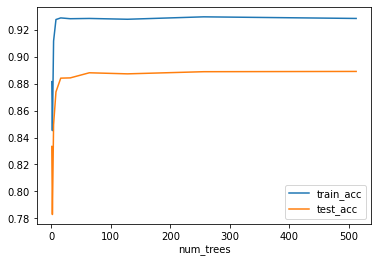

In [8]:
df.set_index(df.columns[0], inplace = True)
df.plot()
data